ME/CFS vs DEPRESSION DATASET

This notebook aims to classify and understand the differences between Myalgic Encephalomyelitis/Chronic Fatigue Syndrome (ME/CFS) and Depression, using a synthetic dataset that reflects real-world patient data.

🎯 Objective

Predict whether a patient has:
- ME/CFS
- Depression
- Or both (Both)
Based on behavioral, clinical, and symptomatic features.

📋 Features and Description

	                                          
- age :	                                      Patient's age
- gender :	                                  Gender (Male / Female / Other)
- fatigue_severity_scale_score :	          Fatigue Severity Scale (FSS), 0–10
- depression_phq9_score	:                     PHQ-9 depression score, 0–27
- pem_present :                               Whether Post-Exertional Malaise (PEM) is present (Yes/No or 1/0)
- pem_duration_hours :	                      Duration of PEM in hours
- sleep_quality_index :	                      Sleep quality (1–10 scale)
- brain_fog_level :	                          Brain fog level (1–10)
- physical_pain_score :                       Physical pain intensity (1–10)
- stress_level :                              Stress level (1–10)
- work_status :	                              Work status: Working / Partially working / Not working
- social_activity_level :                     Social activity: Very low – Very high
- exercise_frequency :	                      Exercise frequency: Never – Daily
- meditation_or_mindfulness :                 Does the patient practice mindfulness or meditation? Yes/No
- hours_of_sleep_per_night :                  Average sleep duration per night
- diagnosis :                                 Target variable: ME/CFS, Depression, Both

⚠️ Key Characteristics

- Contains missing values (NaN) in most features (1–5%), simulating real-world data collection issues.
- All numeric features contain controlled noise to prevent perfect class separation.
- Diagnosis logic is based on clinical-like heuristics, making it suitable for training models that could support real-world decisions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\ezoyd\Downloads\archive\me_cfs_vs_depression_dataset.csv")

In [5]:
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [7]:
# Display basic information about the dataset, including column names, non-null counts, and data types
print("Dataset Info:")
df.info()

# Show the number of missing (null) values in each column
df.isnull().sum()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    obj

age                              0
gender                           0
sleep_quality_index             47
brain_fog_level                 48
physical_pain_score             34
stress_level                    48
depression_phq9_score           22
fatigue_severity_scale_score    21
pem_duration_hours              24
hours_of_sleep_per_night        21
pem_present                      0
work_status                     47
social_activity_level           40
exercise_frequency              39
meditation_or_mindfulness       11
diagnosis                        0
dtype: int64

- The dataset has 1,000 rows and 16 columns. These columns include information about health and daily habits. Some columns have missing values. For example, sleep_quality_index, brain_fog_level, and stress_level are missing in about 40 to 50 rows. Other columns like age, gender, pem_present, and diagnosis do not have any missing values. This information is important for deciding how to deal with the missing data before building a machine learning model.

Data types:
- 8 columns are numeric (float64)
- 2 columns are integers (int64)
- 6 columns are categorical/text (object)

In [10]:
#filling missing values
for col in df.columns:
    if df[col].isnull().any:
        if df[col].dtype == 'object':
            # fill categorical with 'Unknown'
            df[col] = df[col].fillna('Unknown')
        else:
            # fill numerical with median
            df[col] = df[col].fillna(df[col].median())

In [11]:
df.isnull().sum()

age                             0
gender                          0
sleep_quality_index             0
brain_fog_level                 0
physical_pain_score             0
stress_level                    0
depression_phq9_score           0
fatigue_severity_scale_score    0
pem_duration_hours              0
hours_of_sleep_per_night        0
pem_present                     0
work_status                     0
social_activity_level           0
exercise_frequency              0
meditation_or_mindfulness       0
diagnosis                       0
dtype: int64

In [13]:
print("Summary Statistics")
print(df.describe())

Summary Statistics
               age  sleep_quality_index  brain_fog_level  physical_pain_score  \
count  1000.000000           1000.00000      1000.000000          1000.000000   
mean     44.385000              5.47480         5.620800             5.524500   
std      15.321669              2.51036         2.585198             2.521465   
min      18.000000              1.00000         1.000000             1.000000   
25%      31.750000              3.30000         3.400000             3.500000   
50%      45.000000              5.60000         5.800000             5.600000   
75%      57.000000              7.60000         7.800000             7.700000   
max      70.000000             10.00000        10.000000            10.000000   

       stress_level  depression_phq9_score  fatigue_severity_scale_score  \
count   1000.000000            1000.000000                   1000.000000   
mean       5.456300              12.219000                      6.419700   
std        2.504151    

- The average age is about 44 years, with a range between 18 and 70.
- The sleep quality index, brain fog level, and physical pain score have averages around 5.5, with values between 1 and 10.
- The stress level is also similar, with a mean of 5.45.
- The depression score (PHQ-9) has a mean of 12.2 and can go up to 27, which may show moderate to severe depression in some people.
- The fatigue severity score is about 6.4 on average, with some people having 0 and others up to 10.
- The PEM duration (post-exertional malaise) lasts on average 23 hours but ranges from 0 to 47 hours.
- The average sleep per night is around 6.5 hours, with some sleeping only 3 hours and others up to 10 hours.
- The PEM presence column is binary (0 or 1), and the average is about 0.6, meaning about 60% of people have PEM symptoms.

Exploratory Data Analysis

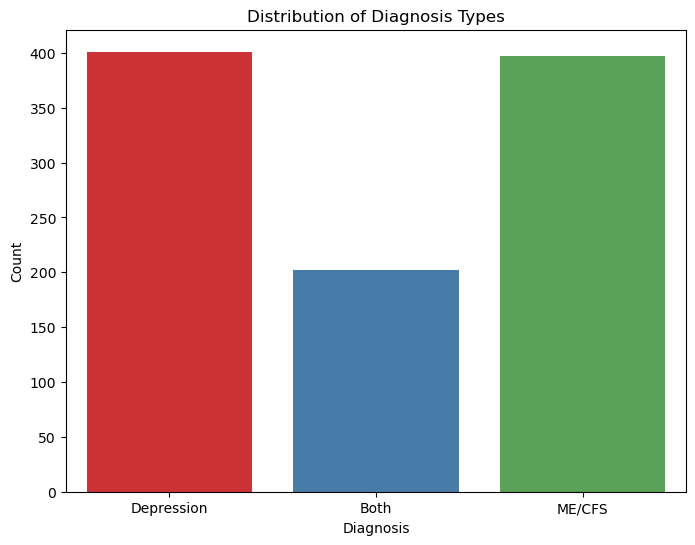

In [17]:
# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='Set1', legend= False)
plt.title('Distribution of Diagnosis Types')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

The target variable shows "Depression" and "ME/CFS" with similar counts, while "Both" has a lower count. This class imbalance may require handling during preprocessing (e.g., oversampling or class weighting).

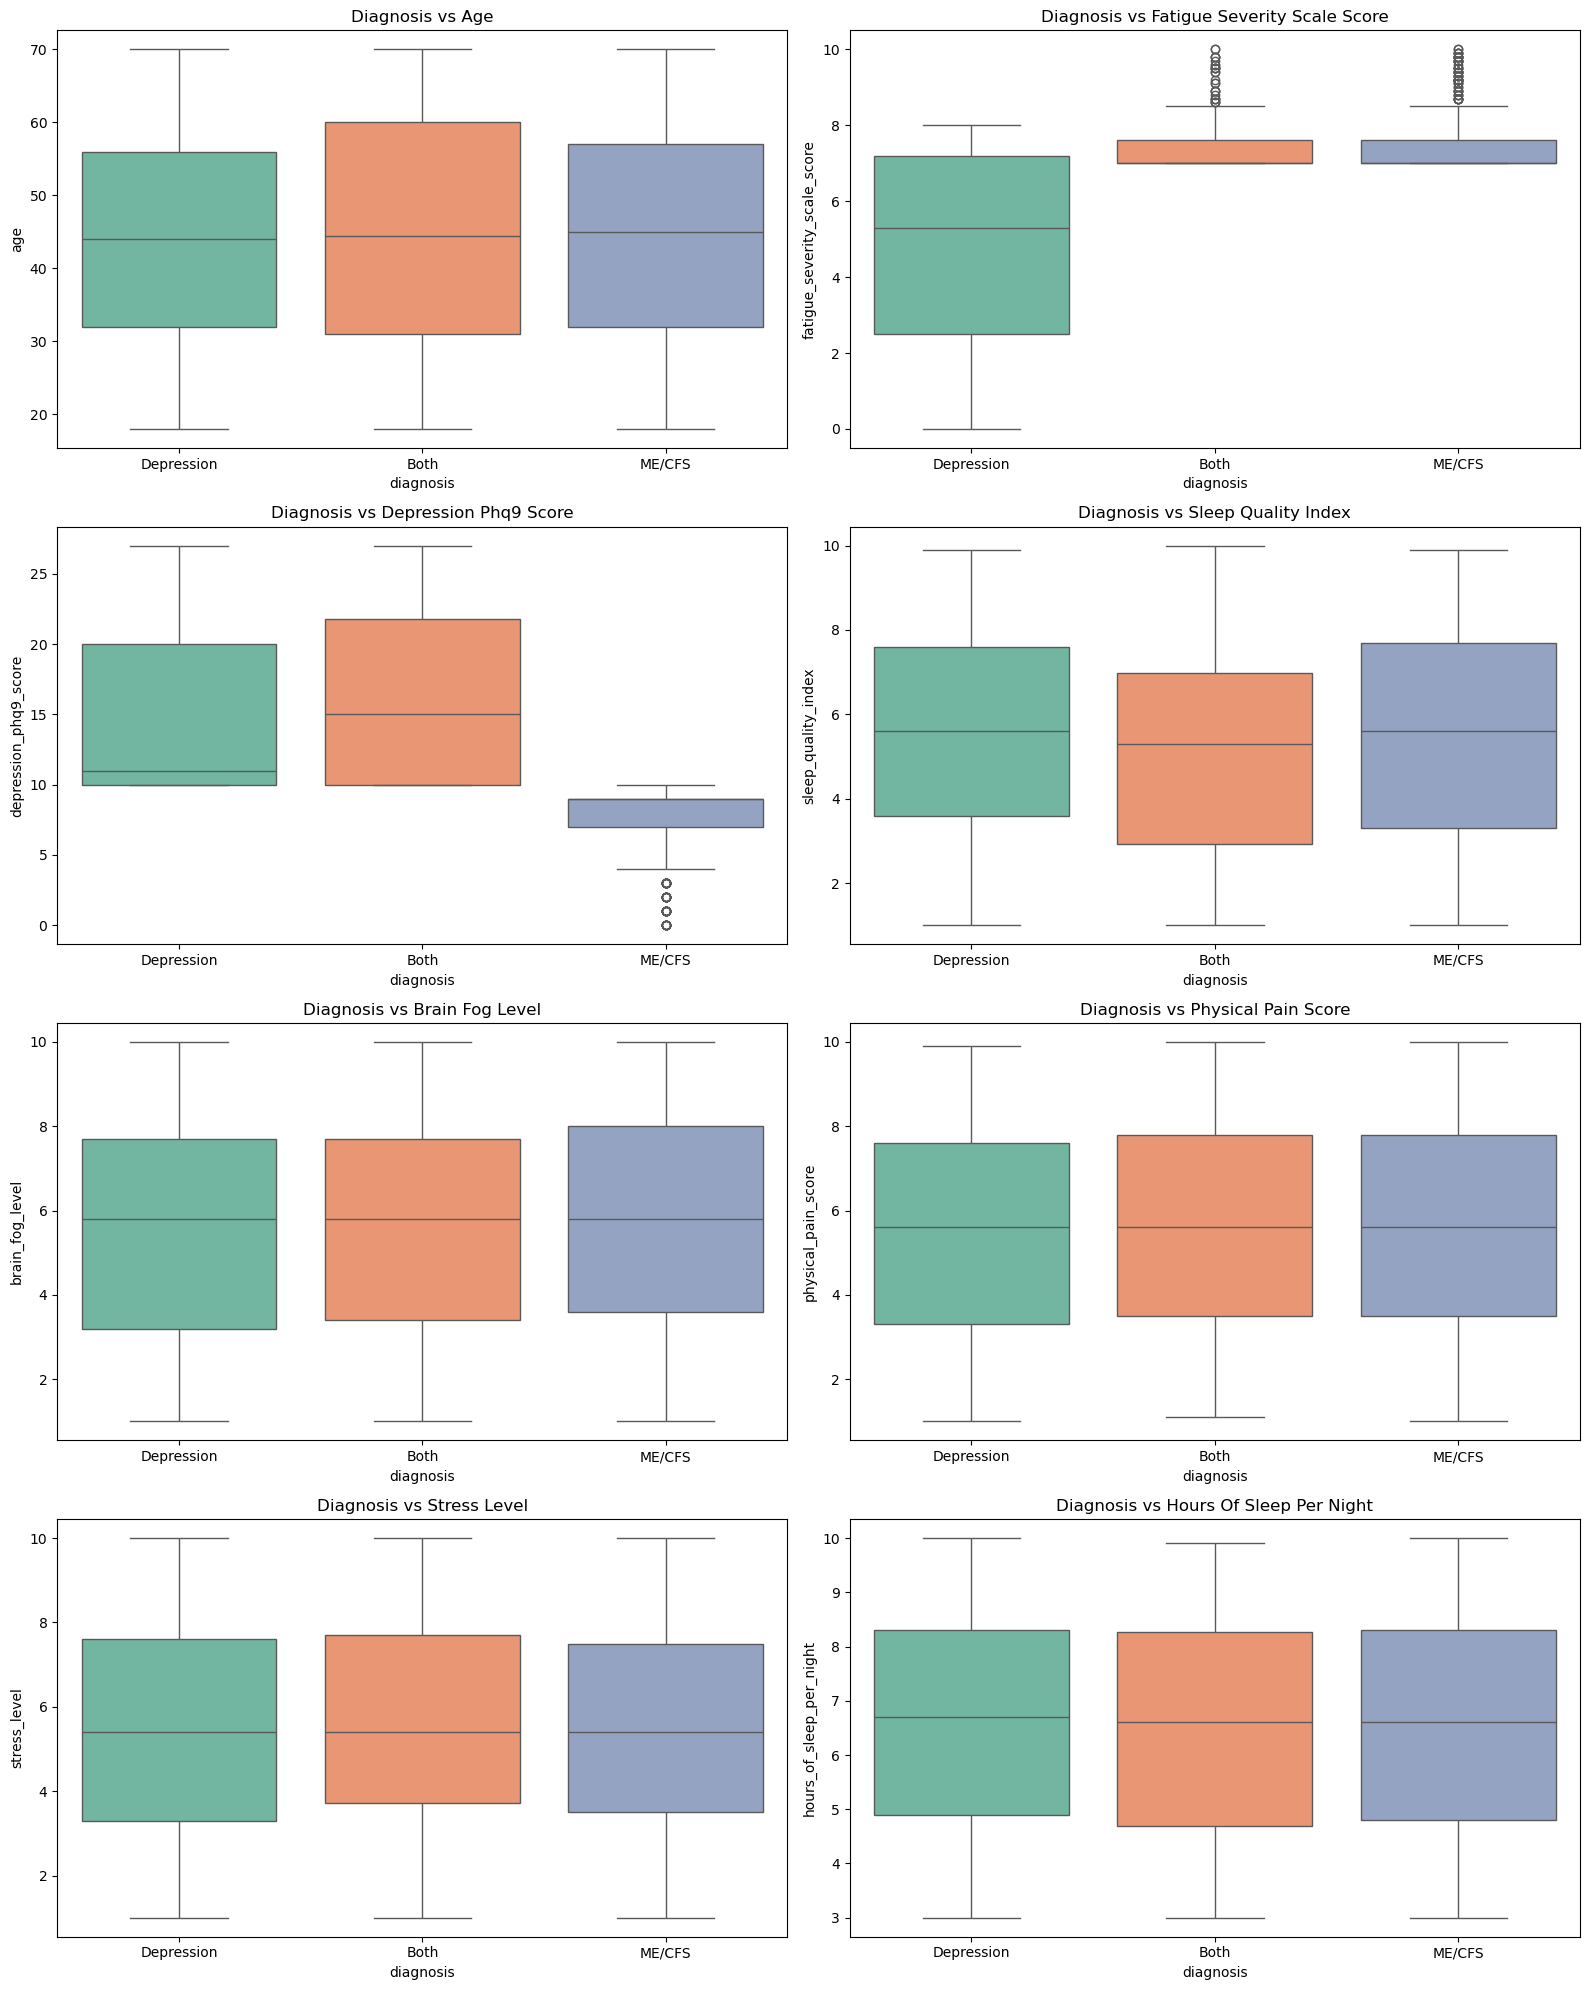

In [27]:
# list of numerical features to visualize
numerical_features = [
    'age',
    'fatigue_severity_scale_score',
    'depression_phq9_score',
    'sleep_quality_index',
    'brain_fog_level',
    'physical_pain_score',
    'stress_level',
    'hours_of_sleep_per_night'
]

# set up the plotting environment
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

# loop through each feature and plot a boxplot vs diagnosis
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='diagnosis', hue='diagnosis', legend=False, y=feature, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Diagnosis vs {feature.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

🔍 Key Insights from Numerical Features
1. Depression PHQ-9 Score – Depression Severity

- Depression group: High scores (median around 20)
- ME/CFS group: Low scores (median around 6–7), showing few depressive symptoms
- Both diagnoses: Medium to high scores (median around 21), closer to depression

✅ Conclusion:
This feature is very useful for telling apart Depression and ME/CFS.

2. Fatigue Severity Scale Score – Fatigue Level

- ME/CFS group: Very high fatigue (median around 7–8)
- Depression group: Moderate fatigue (median around 7–8)
- Both diagnoses: Also high fatigue, but a bit lower than ME/CFS group

✅ Conclusion:
This feature is a strong sign of ME/CFS and helps to separate it from Depression.

3. Other Numerical Features
Some features showed differences but were less clear:
- Sleep quality
- Brain fog
- Pain level
- Stress level
- Hours of sleep per night

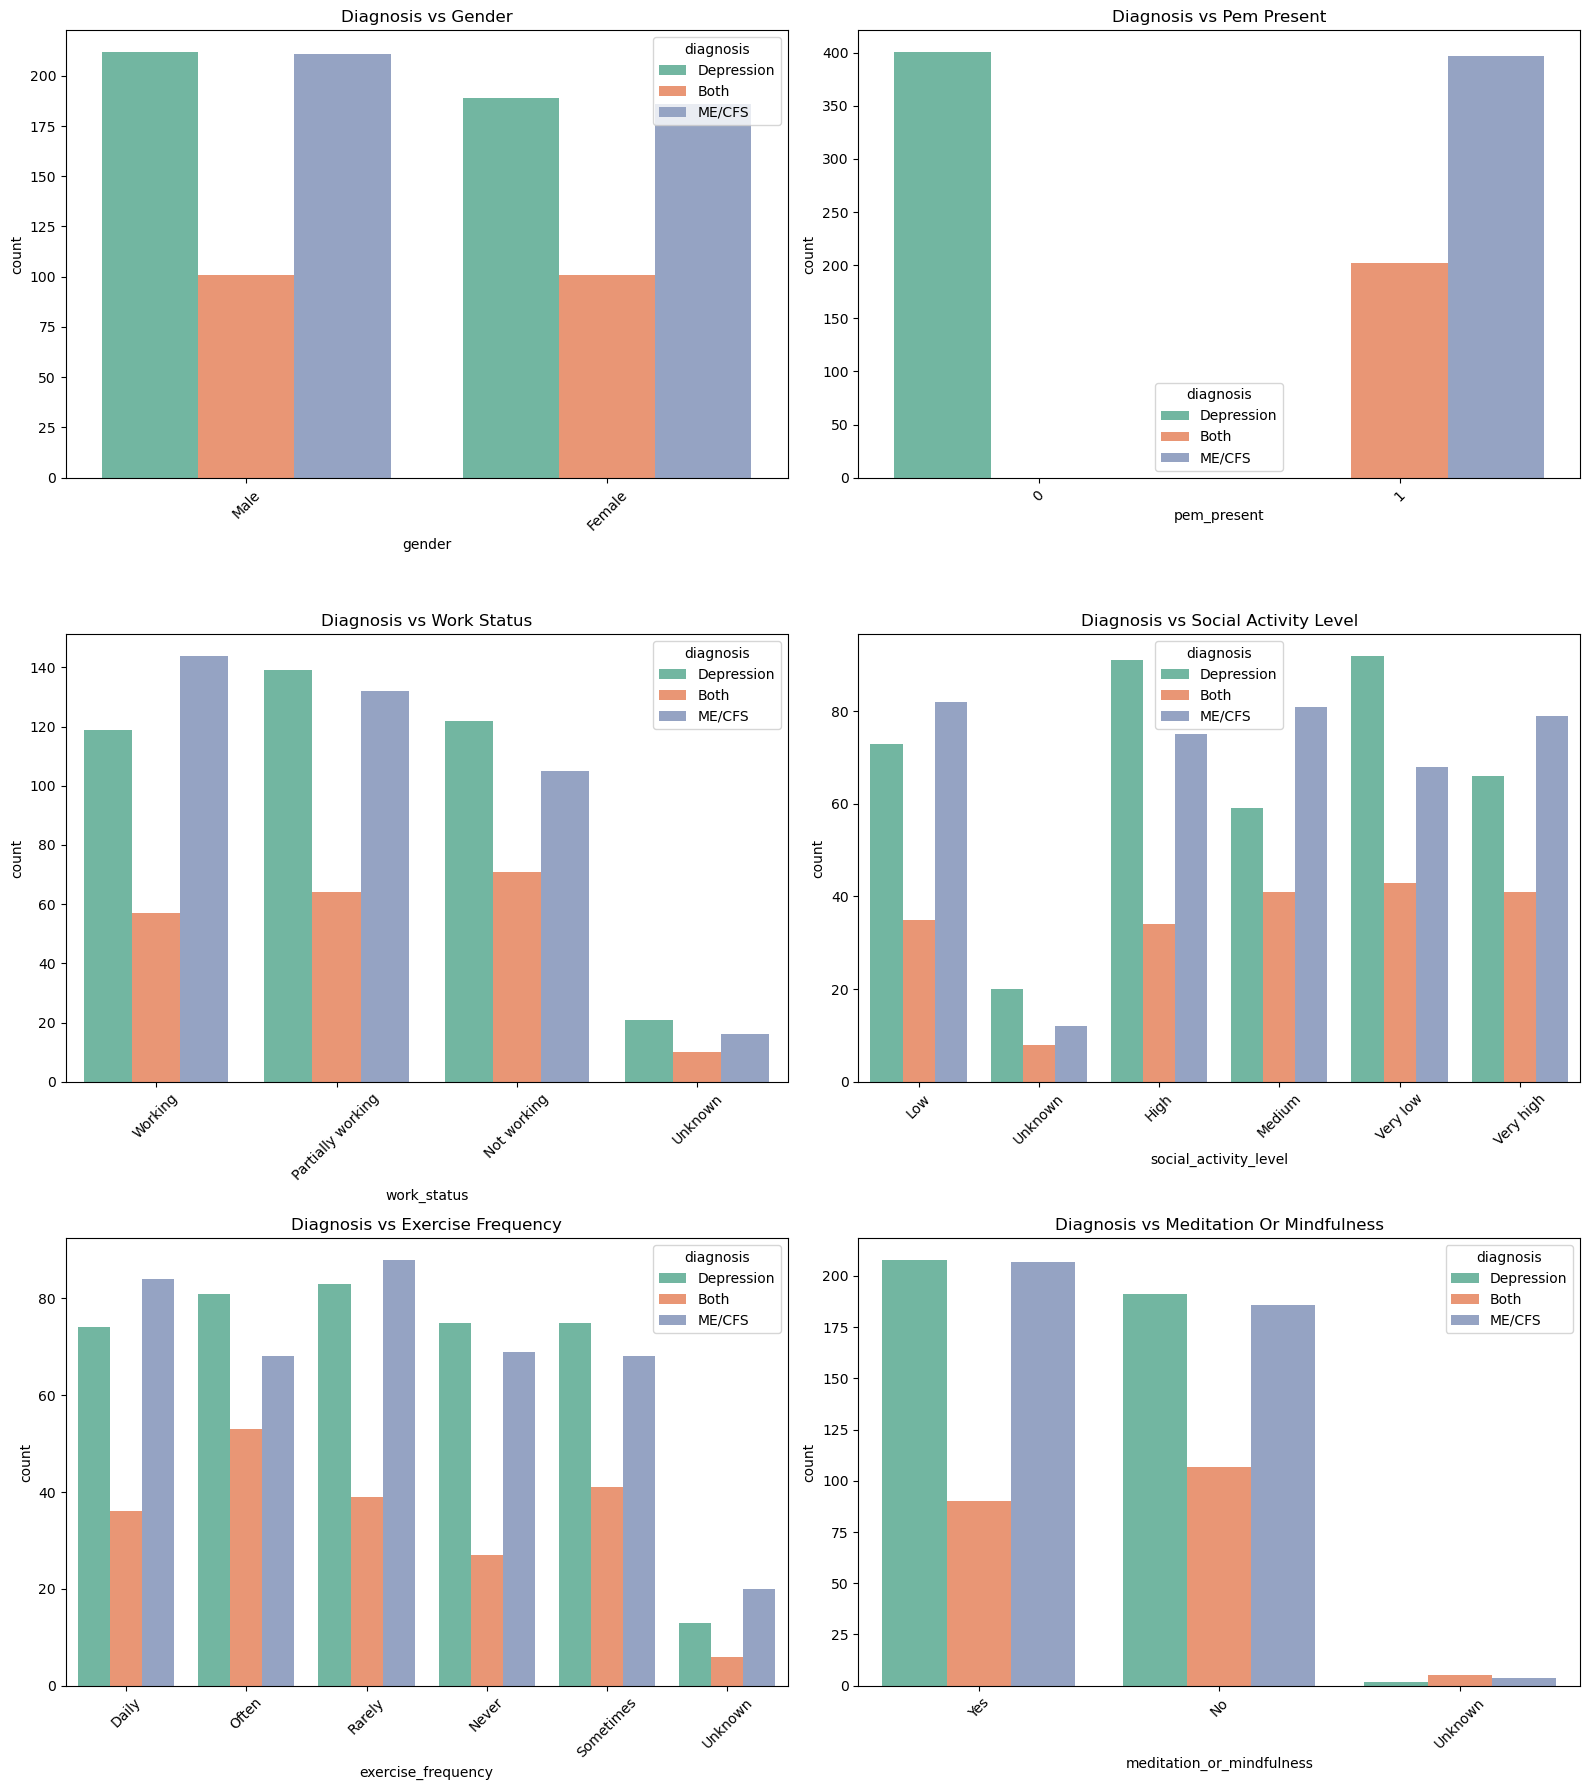

In [23]:
# list of categorical features
categorical_features = [
    'gender',
    'pem_present',
    'work_status',
    'social_activity_level',
    'exercise_frequency',
    'meditation_or_mindfulness'
]

# set up the plotting environment
figs, axess = plt.subplots(3, 2, figsize=(16, 18))
axess = axess.flatten()

# loop through each categorical feature and plot countplot
for i, col_feature in enumerate(categorical_features):
    sns.countplot(data=df, x=col_feature, hue='diagnosis', palette='Set2', ax=axess[i])
    axess[i].set_title(f'Diagnosis vs {col_feature.replace("_", " ").title()}')
    axess[i].tick_params(axis='x', rotation=45)  # Rotate x-labels for readability

# hide any unused subplots (if number of features < total subplots)
for j in range(i+1, len(axess)):
    figs.delaxes(axess[j])

plt.tight_layout()
plt.show()

🧑‍💼 1. Work Status vs Diagnosis
🔍 Observation:

- "Working" is most common in people with ME/CFS.
- "Not working" is most common in people with Depression.
- "Partially working" is similar across all three groups.

📌 Conclusion:
People with ME/CFS are more likely to work compared to those with Depression.
This makes sense, because ME/CFS causes physical problems like fatigue and PEM, but many people still manage to work full-time or part-time.
Depression often causes people to feel withdrawn and lose motivation, which may explain why more of them are not working.

🤝 2. Social Activity Level vs Diagnosis
🔍 Observation:

- "Very low" and "Low" activity levels are more common in the Depression group.
- "Medium", "High", and "Very High" levels are more common in the ME/CFS group.

📌 Conclusion:
People with Depression often avoid social activities.
People with ME/CFS may still stay socially active, even with physical limits.
This shows that social withdrawal is more linked to Depression than to ME/CFS.

- The gender distribution is fairly balanced, with around 600 males and 400 females.
- For work status, about 300 people are working, 330 are partially working, and 280 are not working.
- Social activity level and exercise frequency have several categories, and some (like "Low" or "Daily") appear more often.
- Meditation or mindfulness is imbalanced, with around 600 people saying "Yes" and 400 saying "No".

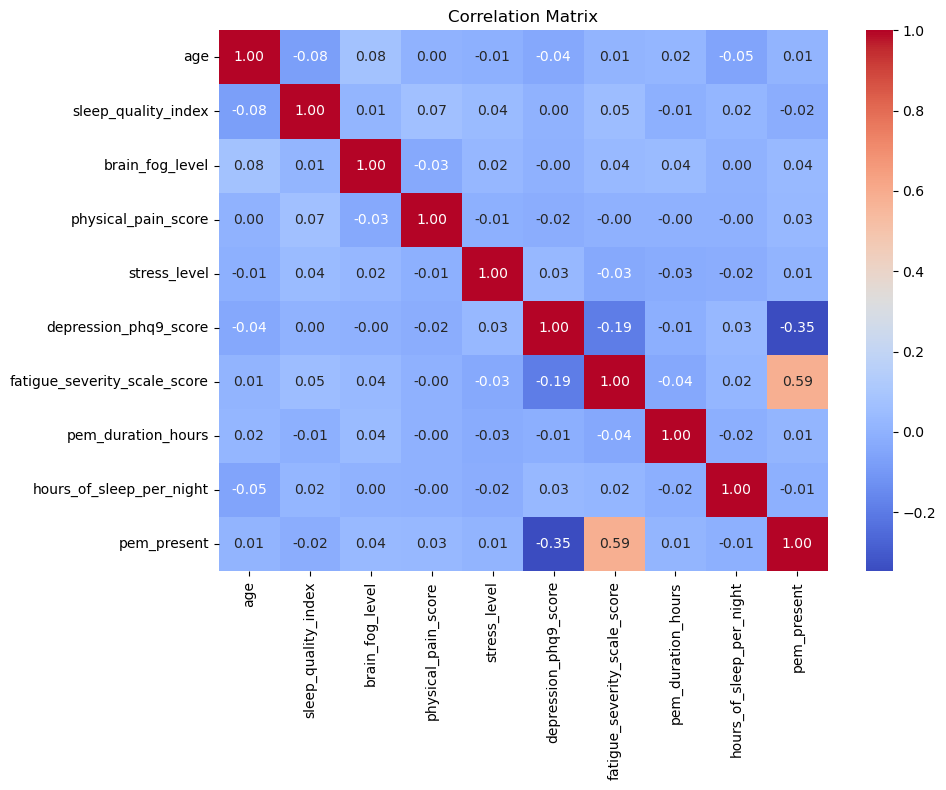

In [22]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

 Correlation Matrix:

- Strong correlations exist within related features: fatigue_severity_scale_score and pem_duration_hours (0.59), depression_phq9_score and pem_present (0.35). This points to multicollinearity that may need addressing.
- Weak correlations with age indicate it may not be a primary driver of diagnosis.
pem_present and hours_of_sleep_per_night show a moderate negative correlation (-0.35), which could be insightful for feature engineering.

In [30]:
#Importing the libraries needed for
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import LabelEncoder #encoding
from sklearn.metrics import classification_report, roc_auc_score #evaluation
from lightgbm import LGBMClassifier #modeling

In [32]:
# make a copy for modeling
df_model = df.copy()

In [33]:
#Identify all categorical columns and prepare a dictionary to store label encoders for each column.
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()
label_encoders = {}

#Convert each categorical column into numbers using LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # save encoder if needed later

In [34]:
# define features and target
X = df_model.drop(columns=['diagnosis'])
y = df_model['diagnosis']

In [35]:
# Split the data into training and test sets (80% train, 20% test). stratify=y keeps the class distribution balanced in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
#LightGBM model is created with a fixed random state.The model is trained using the training data with .fit().
model = LGBMClassifier(random_state=42, verbose=-1)
model.fit(X_train, y_train)

LGBMClassifier(random_state=42, verbose=-1)

In [37]:
# predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)  # for ROC AUC score

In [38]:
# evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       1.00      1.00      1.00        80
           2       0.99      0.99      0.99        79

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



- Accuracy: The model correctly predicted 99% of the 200 test samples.
- Precision: Most of the predictions for each class were correct (between 0.98 and 1.00).
- Recall: The model successfully found almost all true cases in each class.
- F1-score: Since both precision and recall are high, the F1-scores are also very strong (0.98–1.00).

In [39]:
# ROC AUC (for multi-class)
try:
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    print(f"Weighted Average ROC AUC: {auc:.4f}")
except ValueError as e:
    print("ROC AUC score could not be calculated:", e)

Weighted Average ROC AUC: 0.9998


- The model is excellent at separating between the classes.

C:\Users\ezoyd\AppData\Local\Temp\ipykernel_34628\3619252234.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', dodge=False, data=feat_df.head(), palette='viridis')


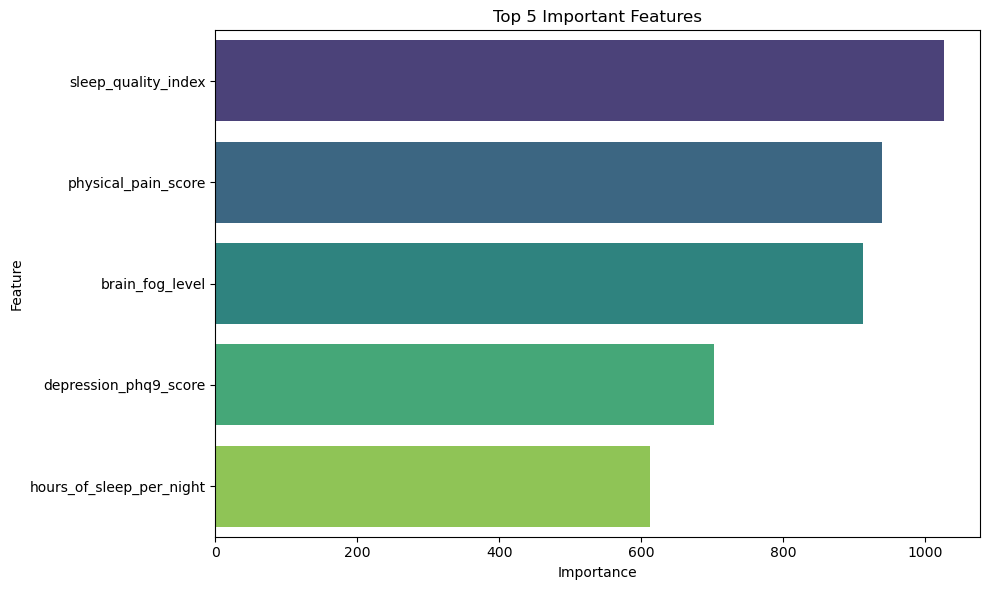

In [46]:
# get feature importances from the model
importances = model.feature_importances_
features = X.columns

# create a DataFrame for visualization
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# plot top 5 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', dodge=False, data=feat_df.head(), palette='viridis')
plt.title('Top 5 Important Features')
plt.tight_layout()
plt.show()

🧠 Feature Importance Analysis

🔝 Top 5 Important Features:
Sleep Quality Index:
- Sleep quality helps to tell the difference between ME/CFS and Depression. Poor sleep is common in both, but especially important in diagnosis.
Physical Pain Score:
- Physical pain is a main symptom of ME/CFS and is an important feature for the model.
Brain Fog Level:
- Problems with focus or memory (“brain fog”) are strongly related to ME/CFS.
Depression PHQ-9 Score:
- This score shows how serious the depression is. It helps to separate Depression from ME/CFS.
Hours of Sleep Per Night:
- The number of hours people sleep also gives helpful information about their condition.

👀 Observations:
- Sleep-related features (like sleep quality and sleep hours) are very important. This shows how strongly sleep is linked to both ME/CFS and Depression.
- Physical symptoms (like pain and brain fog) are useful to identify ME/CFS.
- Mental health scores (like the PHQ-9 depression score) help to detect Depression.

⚠️ Missing Features:
Work Status is not in the top features. 
This could be because:
- Categorical data was encoded simply (e.g., using Label Encoding).
- The data may have some noise or imbalance.
- Work status may still have an effect, but not as direct as other features.

✅ Conclusion:
- The model uses important clinical signals to correctly classify people into ME/CFS, Depression, or Both groups. These results match what is known in the medical field.
📌 Feature Importance
The most important features for predicting the diagnosis were:
- sleep_quality_index
- physical_pain_score
- brain_fog_level
- depression_phq9_score
- hours_of_sleep_per_night

📊 EDA Insights
- Patients with ME/CFS usually have higher fatigue scores (fatigue_severity_scale_score).
- Depression is linked to high depression_phq9_score and low social activity.
- Sleep-related features, like sleep_quality_index and hours_of_sleep_per_night, had a strong effect on the diagnosis.

🤖 Model Performance
- The LightGBM model reached 99% accuracy and a ROC AUC score of 0.9998.
- All three classes (ME/CFS, Depression, Both) were predicted with high precision and recall.
- Adding interaction features (like a combined stress and exercise variable) didn’t improve results much but also didn’t make them worse.

💡 Lessons Learned
- Feature engineering helped discover more complex patterns in the data.
- Even a synthetic dataset can give useful results if it is based on real-world medical knowledge.

📌 **Project by:** Ezo Yedigöl  
🔗 [LinkedIn](www.linkedin.com/in/ezo-yedigöl-aa7947202) | 📧 ezoydgll@gmail.com  